In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [9]:
dir1 = './2024/01/10/'
dir2 = './2024/01/11/'
directories = [dir1, dir2]

def prep_data(directories, crypto_ticker):
    df_list = []
    file_pattern = f"{crypto_ticker}_USDT*_trades.parquet.gzip"
    
    for directory in directories:
        files_pattern = os.path.join(directory, file_pattern)
        all_files = glob.glob(files_pattern)
        for file in all_files:
            df_list.append(pd.read_parquet(file, engine='auto'))
    
    if df_list:
        df = pd.concat(df_list, ignore_index=True)
        df['utc_time'] = pd.to_datetime(df['exchange_ts'], unit='ms', utc=True)
        df.sort_values('exchange_ts', inplace=True)
        df['log_return'] = np.log(df['px'] / df['px'].shift(1))
        df['volatility'] = df.rolling('1H', on='utc_time')['log_return'].std()
        return df
    else:
        return pd.DataFrame()


In [11]:
btc_trades = prep_data(directories, 'BTC')
eth_trades = prep_data(directories, 'ETH')
sol_trades = prep_data(directories, 'SOL')
xrp_trades = prep_data(directories, 'XRP')

/var/folders/np/sw1hsvrj14x94rqhvr0cg5280000gn/T/ipykernel_94662/3148930408.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['volatility'] = df.rolling('1H', on='utc_time')['log_return'].std()
/var/folders/np/sw1hsvrj14x94rqhvr0cg5280000gn/T/ipykernel_94662/3148930408.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['volatility'] = df.rolling('1H', on='utc_time')['log_return'].std()
/var/folders/np/sw1hsvrj14x94rqhvr0cg5280000gn/T/ipykernel_94662/3148930408.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['volatility'] = df.rolling('1H', on='utc_time')['log_return'].std()
/var/folders/np/sw1hsvrj14x94rqhvr0cg5280000gn/T/ipykernel_94662/3148930408.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['volatility'] = df.rolling('1H', on='utc_time')['log

In [12]:
df_logreturns = pd.DataFrame({
    'BTC_log_returns' : btc_trades['log_return'],
    'ETH_log_returns' : eth_trades['log_return'],
    'SOL_log_returns' : sol_trades['log_return'],
    'XRP_log_returns' : xrp_trades['log_return']
})
correlation_matrix = df_logreturns.corr()
correlation_matrix

BTC_log_returns  ETH_log_returns  SOL_log_returns  \
BTC_log_returns         1.000000         0.001849         0.000139   
ETH_log_returns         0.001849         1.000000        -0.000899   
SOL_log_returns         0.000139        -0.000899         1.000000   
XRP_log_returns         0.001347        -0.003328        -0.006118   

                 XRP_log_returns  
BTC_log_returns         0.001347  
ETH_log_returns        -0.003328  
SOL_log_returns        -0.006118  
XRP_log_returns         1.000000

In [13]:
df_px = pd.DataFrame({
    'BTC_px' : btc_trades['px'],
    'ETH_px' : eth_trades['px'],
    'SOL_px' : sol_trades['px'],
    'XRP_px' : xrp_trades['px']
})
correlation_matrix = df_px.corr()
correlation_matrix

BTC_px    ETH_px    SOL_px    XRP_px
BTC_px  1.000000  0.429435  0.359731 -0.546373
ETH_px  0.429435  1.000000  0.133379  0.699693
SOL_px  0.359731  0.133379  1.000000  0.308603
XRP_px -0.546373  0.699693  0.308603  1.000000

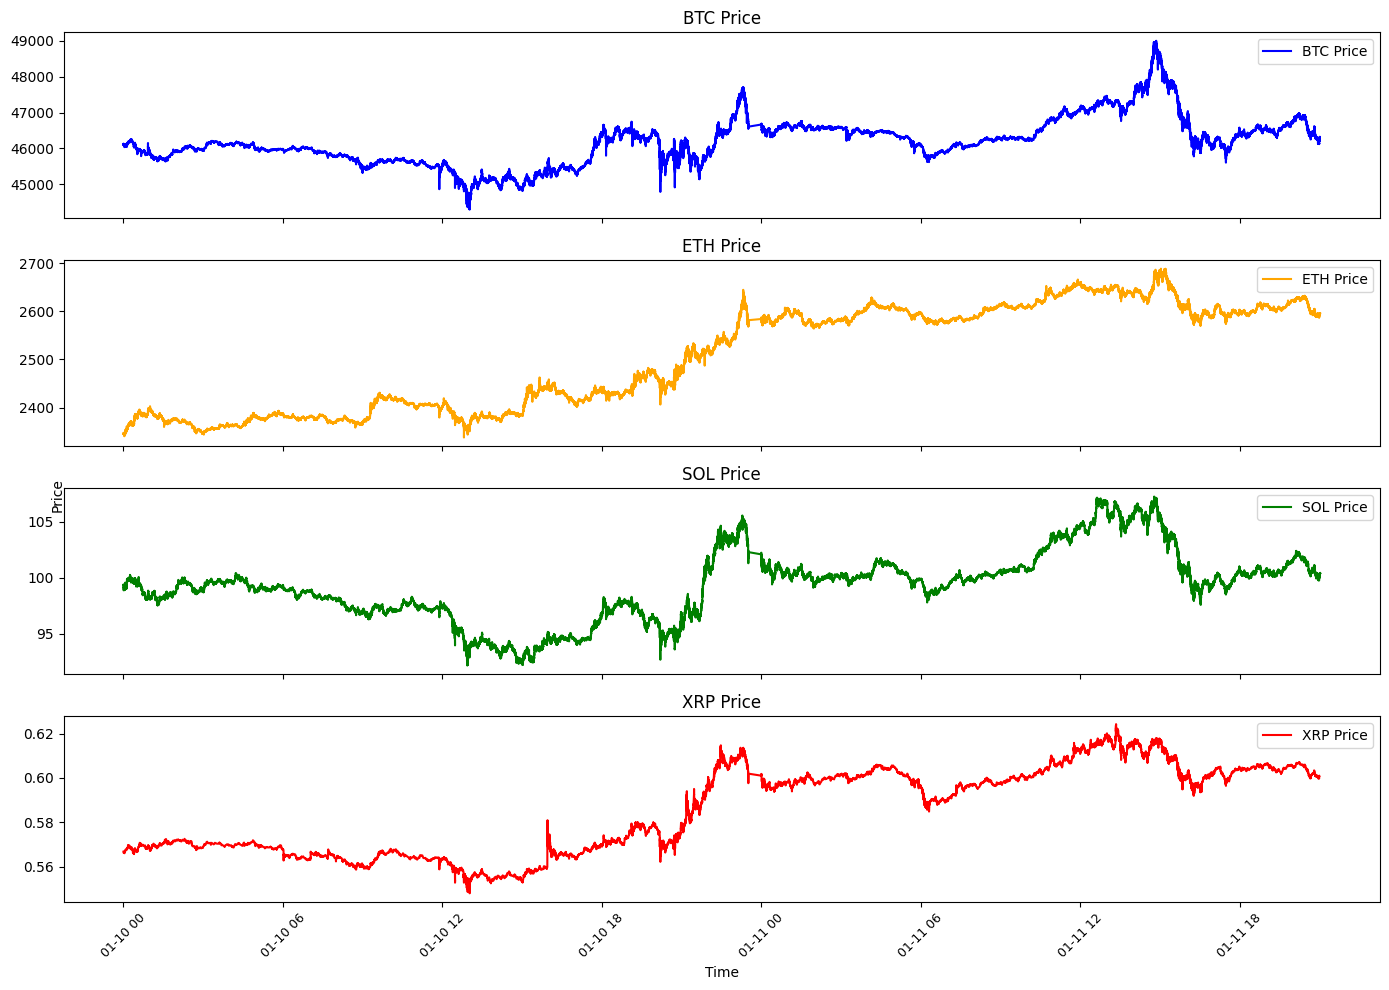

In [14]:

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 10), sharex=True)

axes[0].plot(btc_trades['utc_time'], btc_trades['px'], label='BTC Price', linestyle='-', color='blue')
axes[0].set_title('BTC Price')
axes[0].legend()

axes[1].plot(eth_trades['utc_time'], eth_trades['px'], label='ETH Price', linestyle='-', color='orange')
axes[1].set_title('ETH Price')
axes[1].legend()

axes[2].plot(sol_trades['utc_time'], sol_trades['px'], label='SOL Price', linestyle='-', color='green')
axes[2].set_title('SOL Price')
axes[2].legend()

axes[3].plot(xrp_trades['utc_time'], xrp_trades['px'], label='XRP Price', linestyle='-', color='red')
axes[3].set_title('XRP Price')
axes[3].legend()

plt.xlabel('Time')
fig.text(0.04, 0.5, 'Price', va='center', rotation='vertical')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.tick_params(axis='x', which='major', labelsize=9)

plt.tight_layout()
plt.show()


In [15]:
btc_trades.head()

capture_ts_ns    exchange_ts      create_ts         id       px  \
329277  1704844802827976317  1704844802701  1704844802692  252521724  46115.0   
329278  1704844803217680030  1704844803109  1704844803102  252521725  46115.0   
329279  1704844804668161672  1704844804515  1704844804499  252521726  46111.4   
329280  1704844804685263109  1704844804531  1704844804520  252521727  46107.0   
329281  1704844804699101935  1704844804531  1704844804520  252521728  46105.5   

        signed_qty  contract                         utc_time  log_return  \
329277      -213.0  BTC_USDT 2024-01-10 00:00:02.701000+00:00         NaN   
329278      -363.0  BTC_USDT 2024-01-10 00:00:03.109000+00:00    0.000000   
329279        -5.0  BTC_USDT 2024-01-10 00:00:04.515000+00:00   -0.000078   
329280      -234.0  BTC_USDT 2024-01-10 00:00:04.531000+00:00   -0.000095   
329281      -106.0  BTC_USDT 2024-01-10 00:00:04.531000+00:00   -0.000033   

        volatility  
329277         NaN  
329278         NaN  
329279    0.000055  
329280    0.000051  
329281    0.000043

In [16]:
import pandas as pd
import numpy as np

def prepare_asset_data(df, asset_name):
    df['utc_time'] = pd.to_datetime(df['utc_time']).dt.round('1S')
    
    df = df.groupby('utc_time').last().reset_index()
    
    df[asset_name] = df['px'].ffill()
    
    df[f'{asset_name}_log_return'] = np.log(df[asset_name] / df[asset_name].shift(1))
    
    df[f'{asset_name}_volatility'] = df[f'{asset_name}_log_return'].rolling(window=60, min_periods=1).std()
    
    df.dropna(subset=[f'{asset_name}_log_return'], inplace=True)
    
    return df[['utc_time', f'{asset_name}_log_return', f'{asset_name}_volatility']]

btc_data = prepare_asset_data(btc_trades, 'BTC')
eth_data = prepare_asset_data(eth_trades, 'ETH')
sol_data = prepare_asset_data(sol_trades, 'SOL')
xrp_data = prepare_asset_data(xrp_trades, 'XRP')

combined_data = btc_data.merge(eth_data, on='utc_time', how='outer')
combined_data = combined_data.merge(sol_data, on='utc_time', how='outer')
combined_data = combined_data.merge(xrp_data, on='utc_time', how='outer')

combined_data.dropna(inplace=True)

log_return_columns = [col for col in combined_data.columns if 'log_return' in col]
log_return_corr_matrix = combined_data[log_return_columns].corr()

volatility_columns = [col for col in combined_data.columns if 'volatility' in col]
volatility_corr_matrix = combined_data[volatility_columns].corr()
print("Correlation Matrix for Prices:")
print(log_return_corr_matrix)
print("\nCorrelation Matrix for Volatility:")
print(volatility_corr_matrix)


/var/folders/np/sw1hsvrj14x94rqhvr0cg5280000gn/T/ipykernel_94662/2479985546.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['utc_time'] = pd.to_datetime(df['utc_time']).dt.round('1S')
/var/folders/np/sw1hsvrj14x94rqhvr0cg5280000gn/T/ipykernel_94662/2479985546.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['utc_time'] = pd.to_datetime(df['utc_time']).dt.round('1S')


Correlation Matrix for Prices:
                BTC_log_return  ETH_log_return  SOL_log_return  XRP_log_return
BTC_log_return        1.000000        0.699493        0.608006        0.378477
ETH_log_return        0.699493        1.000000        0.593390        0.392965
SOL_log_return        0.608006        0.593390        1.000000        0.429991
XRP_log_return        0.378477        0.392965        0.429991        1.000000

Correlation Matrix for Volatility:
                BTC_volatility  ETH_volatility  SOL_volatility  XRP_volatility
BTC_volatility        1.000000        0.834041        0.785339        0.371070
ETH_volatility        0.834041        1.000000        0.759281        0.354001
SOL_volatility        0.785339        0.759281        1.000000        0.436773
XRP_volatility        0.371070        0.354001        0.436773        1.000000


/var/folders/np/sw1hsvrj14x94rqhvr0cg5280000gn/T/ipykernel_94662/2479985546.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['utc_time'] = pd.to_datetime(df['utc_time']).dt.round('1S')
/var/folders/np/sw1hsvrj14x94rqhvr0cg5280000gn/T/ipykernel_94662/2479985546.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['utc_time'] = pd.to_datetime(df['utc_time']).dt.round('1S')


Prices: None of the correlations are too high, but the highest correlation is between BTC and ETH
Volatility: BTC, ETH, and SOL seem to have high correlations

Explained Variance Ratio: [0.70788738 0.1907924  0.06052563 0.04079459]
PCA_volatility Loadings:
 [[ 0.54688718  0.53940539  0.54011046  0.34385596]
 [-0.23818887 -0.26082568 -0.09110887  0.93109355]
 [-0.24430047 -0.49858868  0.82275524 -0.12165703]
 [-0.76452453  0.62643525  0.15183439 -0.00523833]]


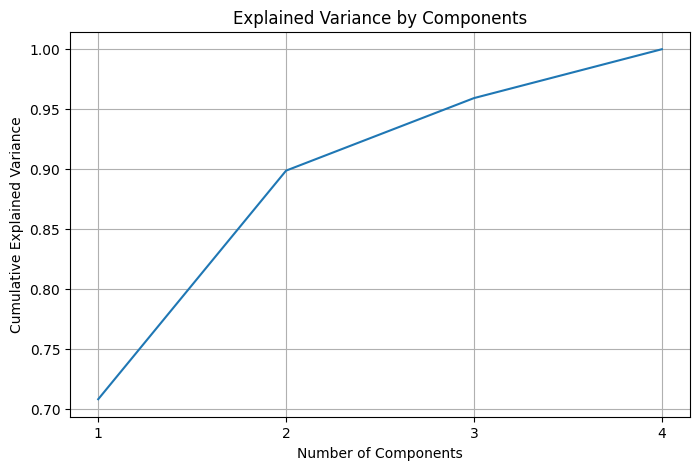

In [22]:
volatility_features = ['BTC_volatility', 'ETH_volatility', 'SOL_volatility', 'XRP_volatility']
volatility_data = combined_data[volatility_features]

volatility_data = volatility_data.dropna()

scaler = StandardScaler()
volatility_scaled = scaler.fit_transform(volatility_data)

pca_volatility = PCA()
principal_components_volatility = pca_volatility.fit_transform(volatility_scaled)

print("Explained Variance Ratio:", pca_volatility.explained_variance_ratio_)

print("PCA_volatility Loadings:\n", pca_volatility.components_)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(pca_volatility.explained_variance_ratio_) + 1), np.cumsum(pca_volatility.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.xticks(np.arange(1, len(pca_volatility.explained_variance_ratio_) + 1))  
plt.grid(True)
plt.show()

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(principal_components)
cluster_labels = kmeans.labels_
print(len(cluster_labels))

9106


Explained Variance Ratio: [0.64337081 0.17606805 0.1057214  0.07483974]
PCA_log_return Loadings:
 [[ 0.53403998  0.53328075  0.51762088  0.40309003]
 [-0.32082638 -0.28581354 -0.07527548  0.89984146]
 [ 0.28996672  0.41063754 -0.84899658  0.16279103]
 [ 0.72649228 -0.68212835 -0.07488014  0.03609495]]


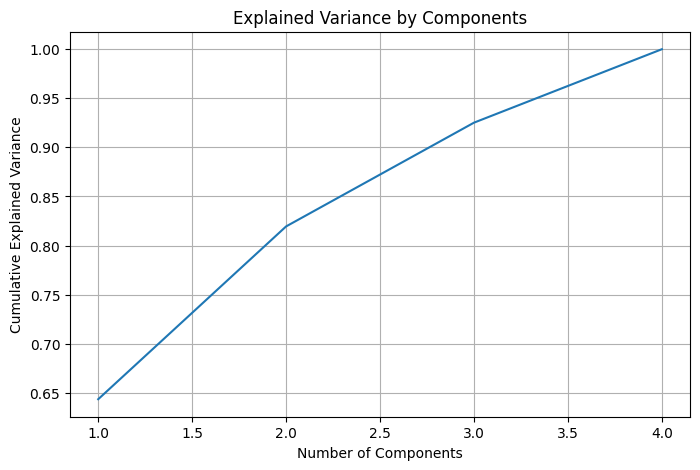

In [26]:
log_return_features = ['BTC_log_return', 'ETH_log_return', 'SOL_log_return', 'XRP_log_return']
log_return_data = combined_data[log_return_features]

log_return_data = log_return_data.dropna()

scaler = StandardScaler()
log_return_scaled = scaler.fit_transform(log_return_data)

pca_log_return = PCA()
principal_components_log_return = pca_log_return.fit_transform(log_return_scaled)

print("Explained Variance Ratio:", pca_log_return.explained_variance_ratio_)

print("PCA_log_return Loadings:\n", pca_log_return.components_)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(pca_log_return.explained_variance_ratio_) + 1), np.cumsum(pca_log_return.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


In [24]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(len(coeff[:,0])):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

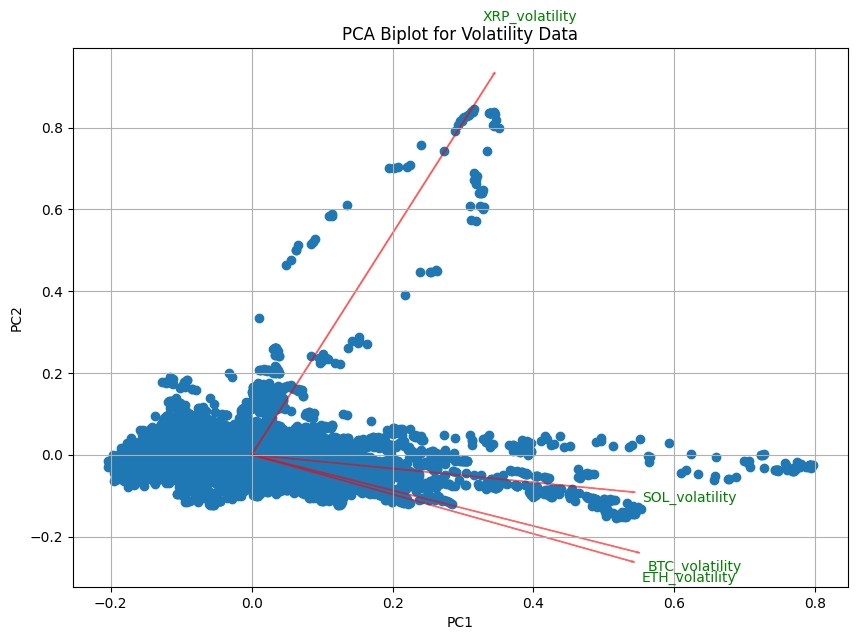

In [25]:
plt.figure(figsize=(10, 7))
biplot(principal_components_volatility[:, :2], np.transpose(pca_volatility.components_[0:2, :]), labels=volatility_features)
plt.title('PCA Biplot for Volatility Data')
plt.show()

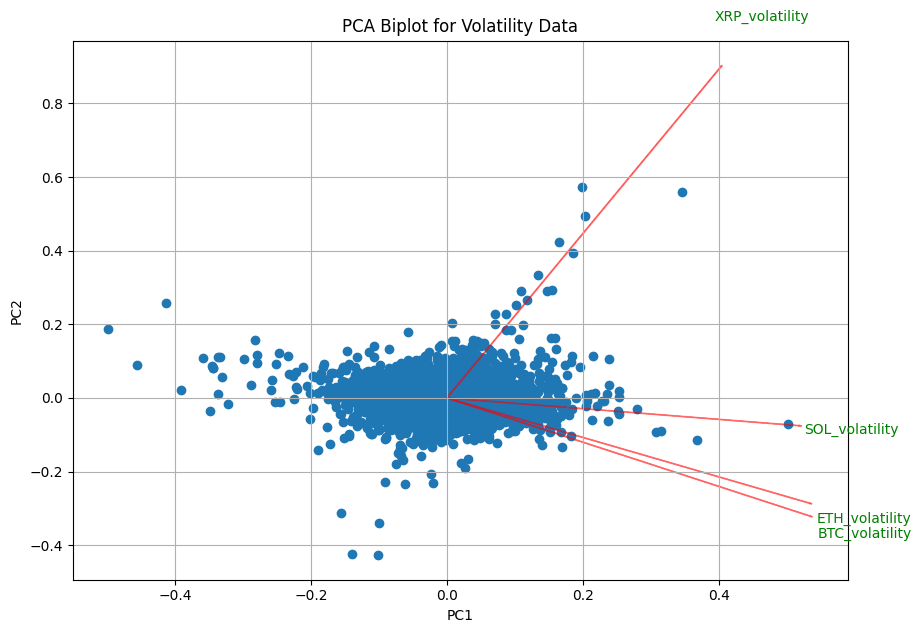

In [29]:
plt.figure(figsize=(10, 7))
biplot(principal_components_log_return[:, :2], np.transpose(pca_log_return.components_[0:2, :]), labels=volatility_features)
plt.title('PCA Biplot for Volatility Data')
plt.show()


In [34]:
def biplot_3d(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    zs = score[:,2]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    scalez = 1.0/(zs.max() - zs.min())

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs * scalex, ys * scaley, zs * scalez)

    for i in range(len(coeff)):
        ax.quiver(0, 0, 0, coeff[i,0], coeff[i,1], coeff[i,2], color='r', alpha=0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1]* 1.15, coeff[i,2]* 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1]* 1.15, coeff[i,2]* 1.15, labels[i], color='g', ha='center', va='center')

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.show()


In [35]:
plt.figure(figsize=(10, 7))
plt.title('PCA Biplot for Volatility Data')
biplot_3d(principal_components_volatility, np.transpose(pca_volatility.components_[:3, :]), labels=volatility_features)

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

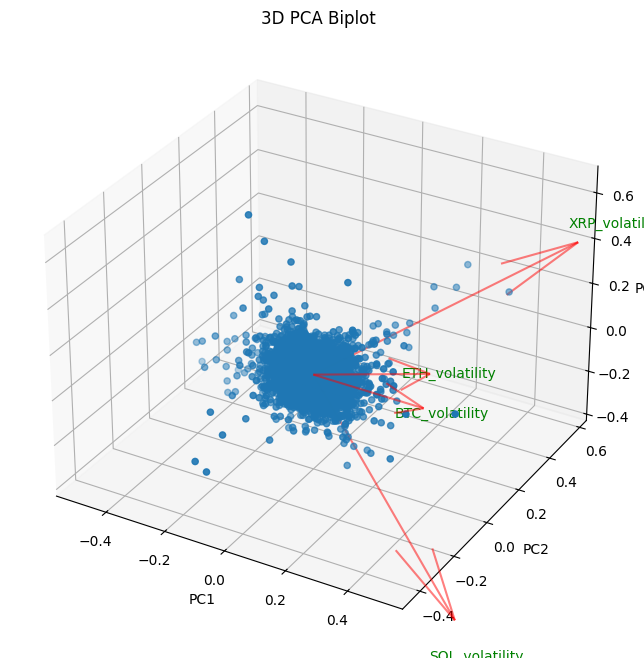

In [37]:
plt.figure(figsize=(10, 7))
biplot_3d(principal_components_log_return, np.transpose(pca_log_return.components_[:3, :]), labels=volatility_features)


From here we can see that BTC & ETH tend to move similarly across both log_returns as well as volatility. SOL seems to slightly be in that same direction, but when accounting for the 3rd principal component they deviate from the two. XRP seems to be uncorrelated with all of them past the first component.